170498071/170498071 [==============================] - 13s 0us/step
Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                              

Epoch 1/100
800/800 - 45s - loss: 1.7482 - accuracy: 0.3696 - val_loss: 1.7784 - val_accuracy: 0.4190 - 45s/epoch - 56ms/step
Epoch 2/100
800/800 - 28s - loss: 1.3612 - accuracy: 0.5150 - val_loss: 1.3589 - val_accuracy: 0.5478 - 28s/epoch - 36ms/step
Epoch 3/100
800/800 - 29s - loss: 1.1826 - accuracy: 0.5877 - val_loss: 1.0503 - val_accuracy: 0.6416 - 29s/epoch - 36ms/step
Epoch 4/100
800/800 - 28s - loss: 1.0551 - accuracy: 0.6345 - val_loss: 0.8892 - val_accuracy: 0.6883 - 28s/epoch - 35ms/step
Epoch 5/100
800/800 - 30s - loss: 0.9790 - accuracy: 0.6661 - val_loss: 1.0537 - val_accuracy: 0.6612 - 30s/epoch - 38ms/step
Epoch 6/100
800/800 - 31s - loss: 0.9117 - accuracy: 0.6891 - val_loss: 1.0208 - val_accuracy: 0.6693 - 31s/epoch - 38ms/step
Epoch 7/100
800/800 - 30s - loss: 0.8623 - accuracy: 0.7091 - val_loss: 0.7652 - val_accuracy: 0.7359 - 30s/epoch - 37ms/step
Epoch 8/100
800/800 - 29s - loss: 0.8285 - accuracy: 0.7184 - val_loss: 0.7147 - val_accuracy: 0.7564 - 29s/epoch - 36

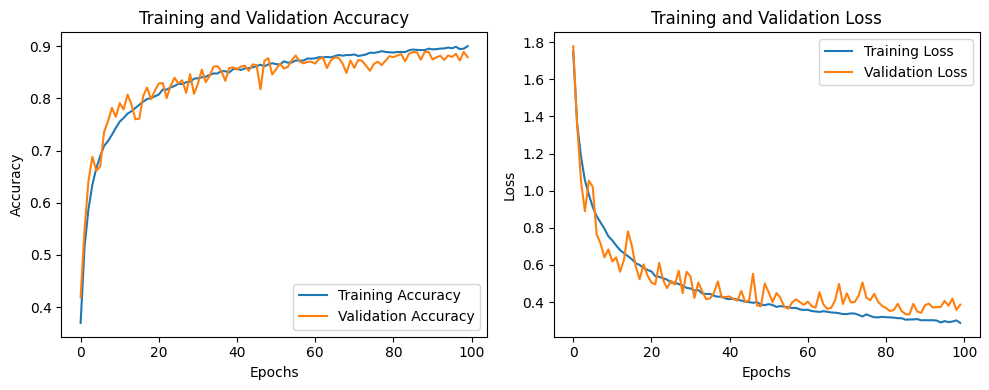

313/313 [==============================] - 1s 4ms/step - loss: 0.3968 - accuracy: 0.8808
Test Loss: 0.39684635400772095
Test Accuracy: 0.8808000087738037


In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 1. One-hot encode the labels
y_train_vec = to_categorical(y_train, num_classes=10)
y_test_vec = to_categorical(y_test, num_classes=10)

# 1.3. Randomly partition the training set to training and validation sets
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[:40000]
valid_indices = rand_indices[40000:]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

# 2. Build a CNN and tune its hyper-parameters - 4 convolution 2D layerlayers and one dense layer
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

# 2.1. Data Augmentation  Helps to mitigate overfitting.
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_tr)

# 3. Train the model
learning_rate = 0.001
epochs = 100  # Number of epochs

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(
    datagen.flow(x_tr, y_tr, batch_size=50), #Training the model with complete 50K dataset
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose=2
)

# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# 4. Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test_vec)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
